Imported the necessary packages

In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


# Import Data

In [374]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\conversion_data.csv")

# Dataframe Checks

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [376]:
df.describe(include = "all")

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [377]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


### Conclusions:

All values have 2000 entries, therefore no null values need to be filled

All variables seem to have the correct data type

unnamed:0 column can be removed as it has the same use as vistor_id and starts from 0

the gender variable should be changed to display 0 or 1 as opposed to M and F

All of the ranges of the data seem to make sense, there are no clear and obvious outliers

Categorical Variables: visitor_location, marketing_channel, gender

Continuous Variables: product_views, avg_rating, avg_price, time_on_site, pages_visited, converted_Fri

# Data Cleaning

Drop all duplicate values, in this case it would only remove a column if a customer ID was used twice

In this case, no double entries happened

In [378]:
df.drop_duplicates(inplace=True)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [380]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

drop the unnamed: 0 column as it is of no use to us

In [381]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [382]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

Look at all the variables on their own to see if there are any clear and obvious outliers or issues with the data

Most of the data seems uniformly distributed except for some of the product views graphs. The product views graphs for Thursday and Friday have negative values. This meaning the person viewed a negative amount of values. Since this does not make theoretical sense, I will remove these variables to finish off the data cleaning process. 

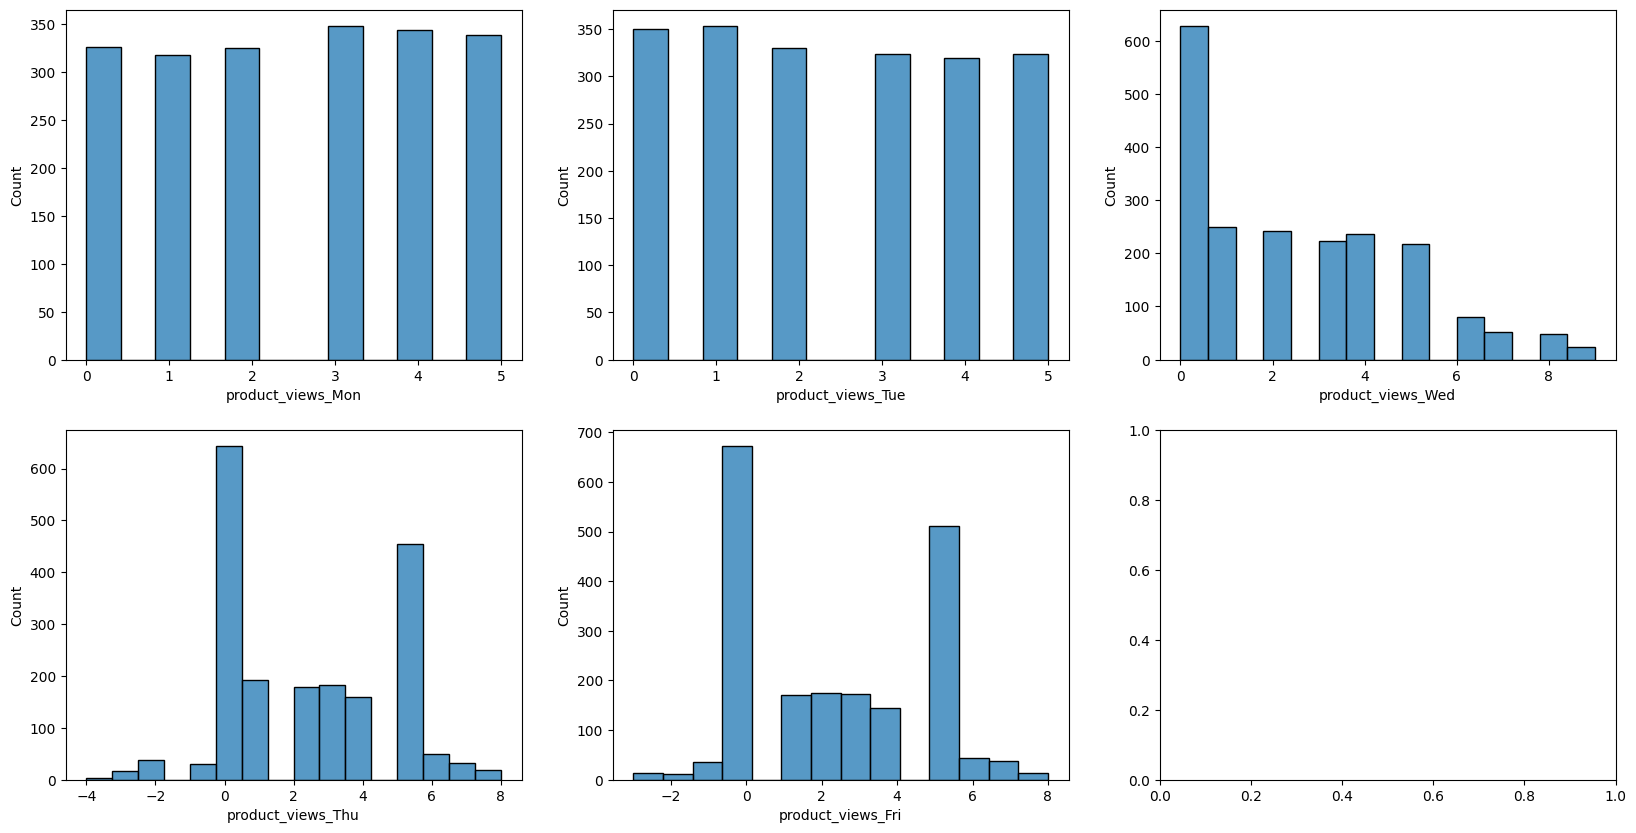

In [383]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['product_views_Mon'], ax=ax1)
sns.histplot(df['product_views_Tue'], ax=ax2)
sns.histplot(df['product_views_Wed'], ax=ax3)
sns.histplot(df['product_views_Thu'], ax=ax4)
sns.histplot(df['product_views_Fri'], ax=ax5)

plt.show()

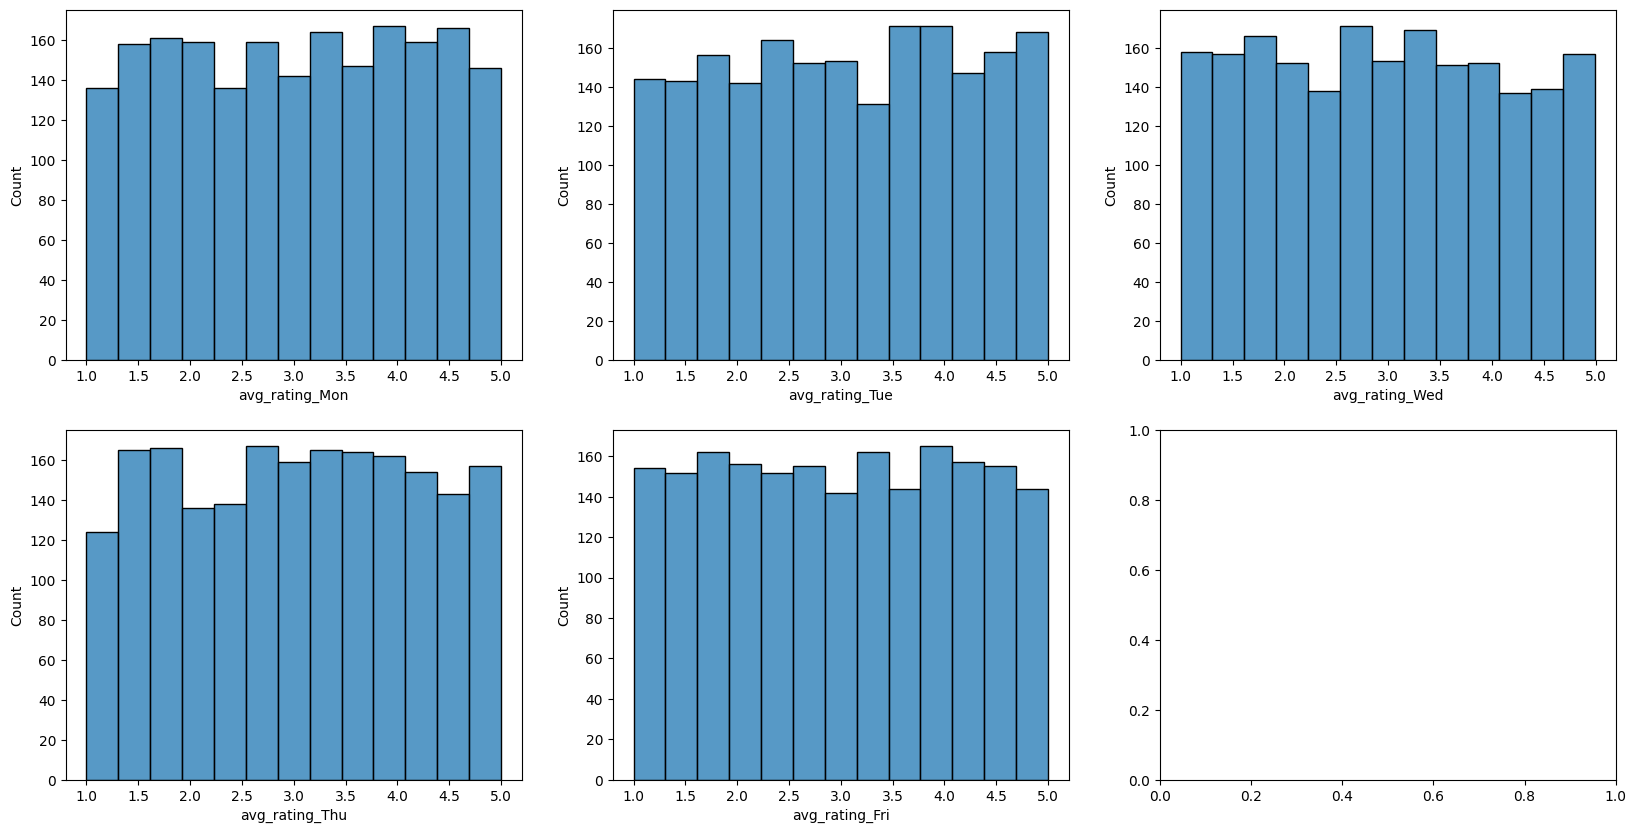

In [384]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['avg_rating_Mon'], ax=ax1)
sns.histplot(df['avg_rating_Tue'], ax=ax2)
sns.histplot(df['avg_rating_Wed'], ax=ax3)
sns.histplot(df['avg_rating_Thu'], ax=ax4)
sns.histplot(df['avg_rating_Fri'], ax=ax5)

plt.show()

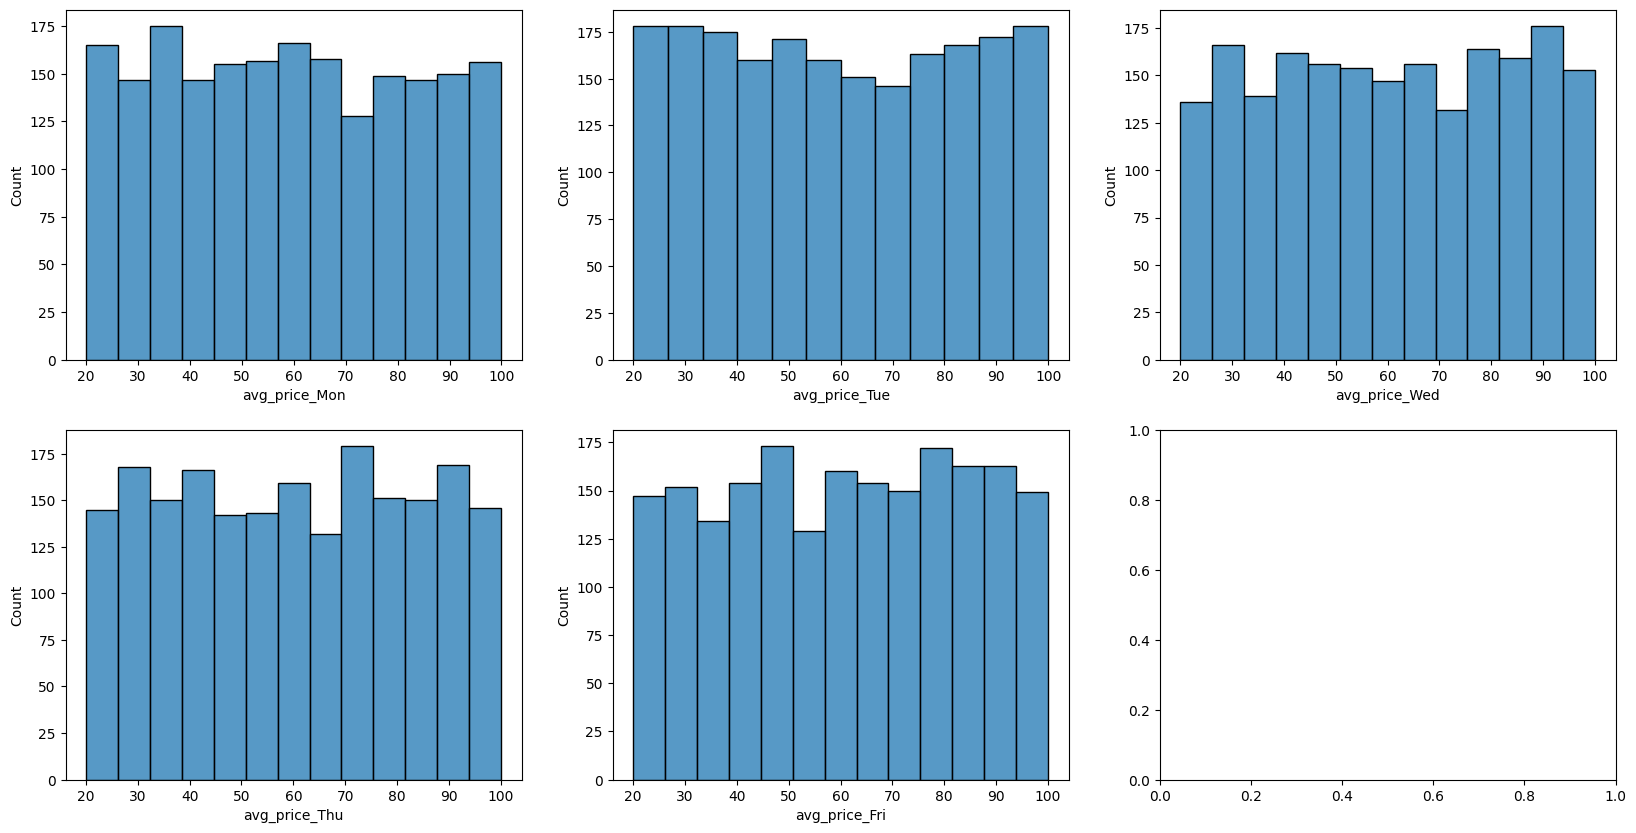

In [385]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['avg_price_Mon'], ax=ax1)
sns.histplot(df['avg_price_Tue'], ax=ax2)
sns.histplot(df['avg_price_Wed'], ax=ax3)
sns.histplot(df['avg_price_Thu'], ax=ax4)
sns.histplot(df['avg_price_Fri'], ax=ax5)

plt.show()

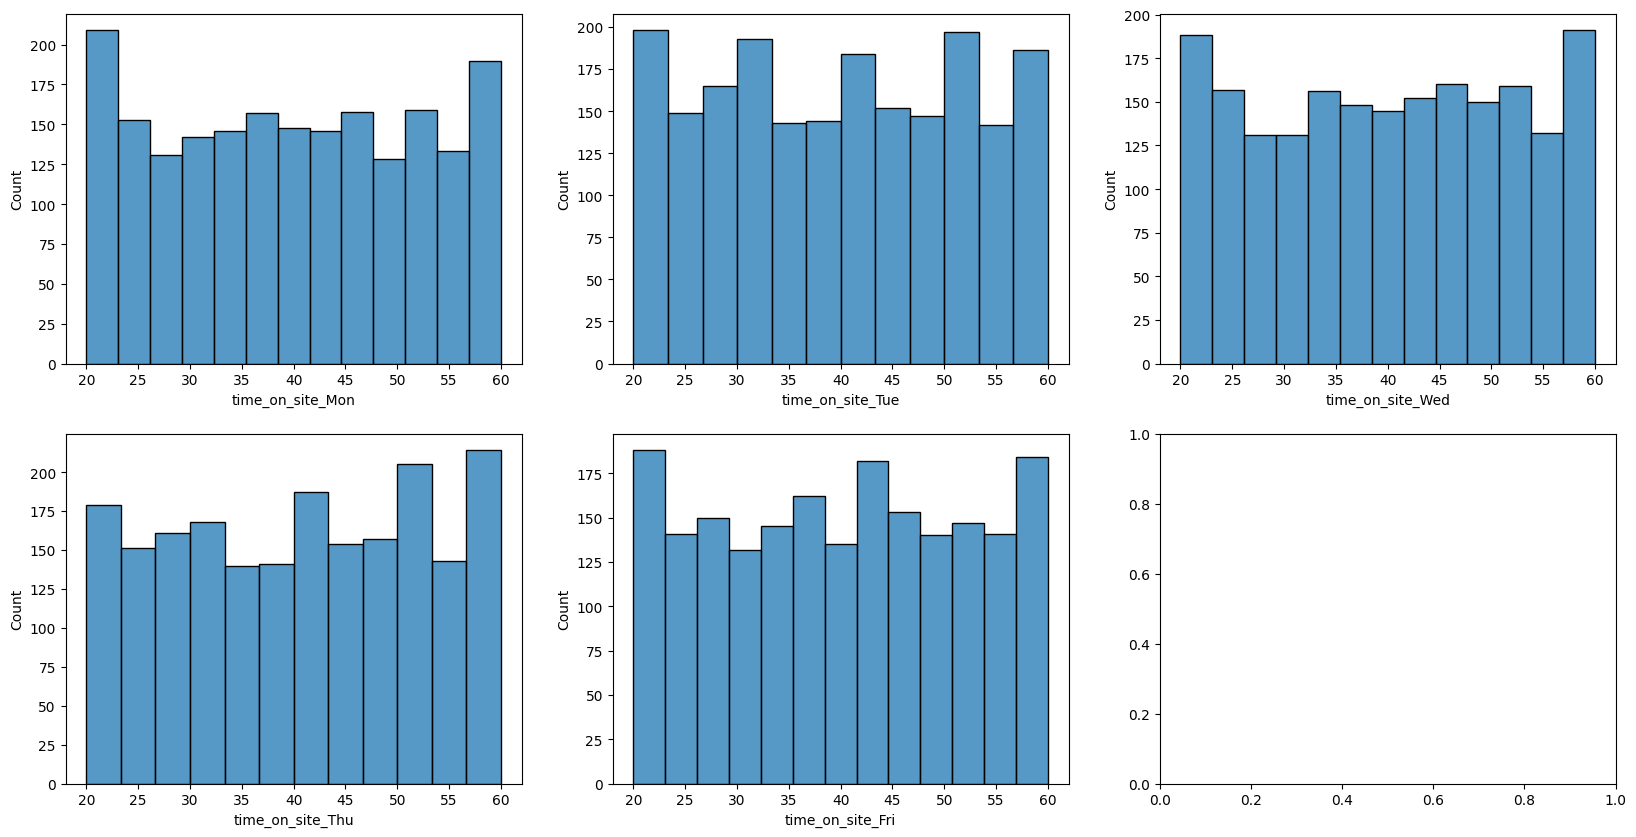

In [386]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['time_on_site_Mon'], ax=ax1)
sns.histplot(df['time_on_site_Tue'], ax=ax2)
sns.histplot(df['time_on_site_Wed'], ax=ax3)
sns.histplot(df['time_on_site_Thu'], ax=ax4)
sns.histplot(df['time_on_site_Fri'], ax=ax5)

plt.show()

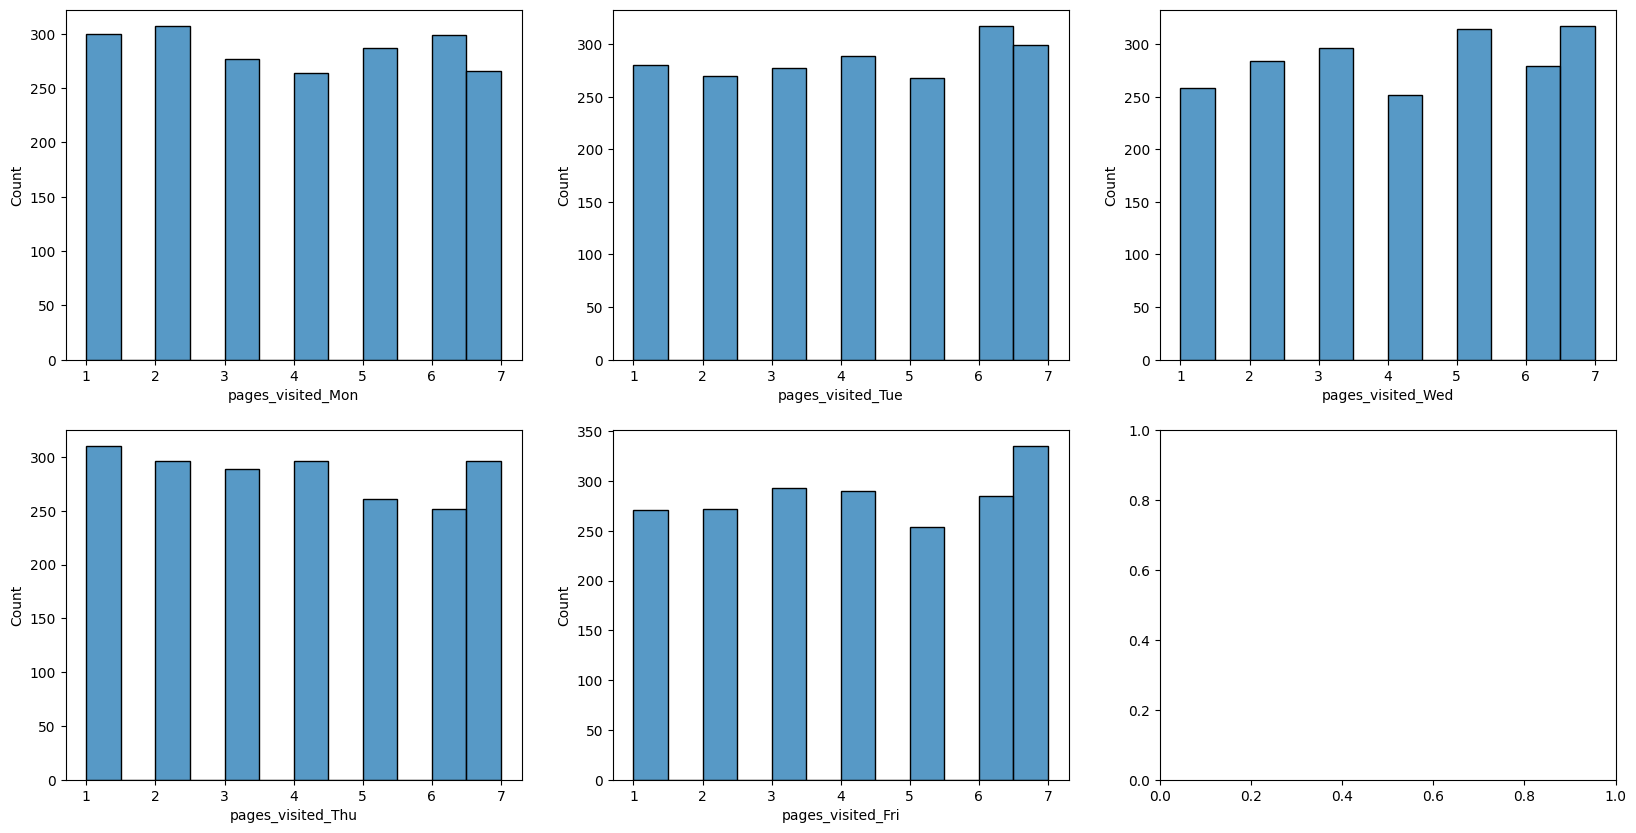

In [387]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['pages_visited_Mon'], ax=ax1)
sns.histplot(df['pages_visited_Tue'], ax=ax2)
sns.histplot(df['pages_visited_Wed'], ax=ax3)
sns.histplot(df['pages_visited_Thu'], ax=ax4)
sns.histplot(df['pages_visited_Fri'], ax=ax5)

plt.show()

In [388]:
df[df['product_views_Thu'] < 0]

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,22,34,31,1,3,3,2,3,1
17,18,South America,facebook,F,4,1,0,-2,5,2.33,...,60,24,35,31,7,5,6,4,2,1
34,35,South America,organic,F,0,0,3,-2,5,2.13,...,39,32,60,53,1,7,2,5,7,1
89,90,Asia,youtube,F,1,3,1,-4,2,4.26,...,49,50,49,27,2,3,6,6,5,1
117,118,North America,facebook,F,5,1,3,-2,5,1.53,...,24,51,56,47,5,6,4,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,1949,Europe,youtube,F,5,3,4,-2,3,4.56,...,23,28,48,38,6,7,3,5,7,1
1956,1957,Australia,youtube,M,3,1,2,-1,4,4.63,...,33,57,47,54,2,1,1,2,3,1
1965,1966,Europe,google,M,4,5,5,-1,5,2.38,...,34,55,49,60,4,5,4,4,3,1
1971,1972,North America,organic,F,5,5,4,-2,5,4.78,...,54,46,58,42,4,2,7,2,5,1


In [389]:
df[df['product_views_Fri'] < 0]

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
35,36,South America,google,M,4,3,4,4,-3,3.58,...,30,56,44,41,2,6,2,3,3,1
78,79,Asia,facebook,F,4,4,5,5,-1,4.06,...,26,26,43,38,6,1,5,4,7,1
115,116,Asia,instagram,F,3,5,2,5,-2,2.02,...,52,40,35,52,1,3,5,3,5,1
140,141,Australia,google,F,2,5,2,0,-3,1.77,...,22,33,56,58,6,6,2,7,3,1
163,164,Europe,organic,M,4,1,0,2,-1,3.97,...,31,48,49,35,1,4,4,5,2,1
167,168,Europe,instagram,F,3,0,3,1,-2,3.88,...,25,41,39,57,3,6,4,7,3,1
178,179,North America,google,F,1,2,5,1,-1,2.32,...,42,47,50,33,5,7,1,5,1,1
194,195,North America,instagram,M,0,3,4,4,-2,1.76,...,50,46,56,35,2,3,6,5,1,1
221,222,Asia,instagram,M,5,0,3,4,-1,4.80,...,42,22,47,39,2,7,4,7,5,1
226,227,Europe,youtube,F,3,1,3,2,-1,3.35,...,42,53,35,20,1,2,7,6,4,1


Since the 88 rows for negative views on Thursday and the 60 negative views on Friday are less than 10% of the total data, I will remove these values from the dataset

(60 + 88) / 2000 = 0.074 or 7.4%

In [390]:
df.drop(df[df['product_views_Thu'] < 0].index, axis=0, inplace=True)

In [391]:
df.drop(df[df['product_views_Fri'] < 0].index, axis=0, inplace=True)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         1859 non-null   int64  
 1   visitor_location   1859 non-null   object 
 2   marketing_channel  1859 non-null   object 
 3   gender             1859 non-null   object 
 4   product_views_Mon  1859 non-null   int64  
 5   product_views_Tue  1859 non-null   int64  
 6   product_views_Wed  1859 non-null   int64  
 7   product_views_Thu  1859 non-null   int64  
 8   product_views_Fri  1859 non-null   int64  
 9   avg_rating_Mon     1859 non-null   float64
 10  avg_rating_Tue     1859 non-null   float64
 11  avg_rating_Wed     1859 non-null   float64
 12  avg_rating_Thu     1859 non-null   float64
 13  avg_rating_Fri     1859 non-null   float64
 14  avg_price_Mon      1859 non-null   float64
 15  avg_price_Tue      1859 non-null   float64
 16  avg_price_Wed      1859 non-n

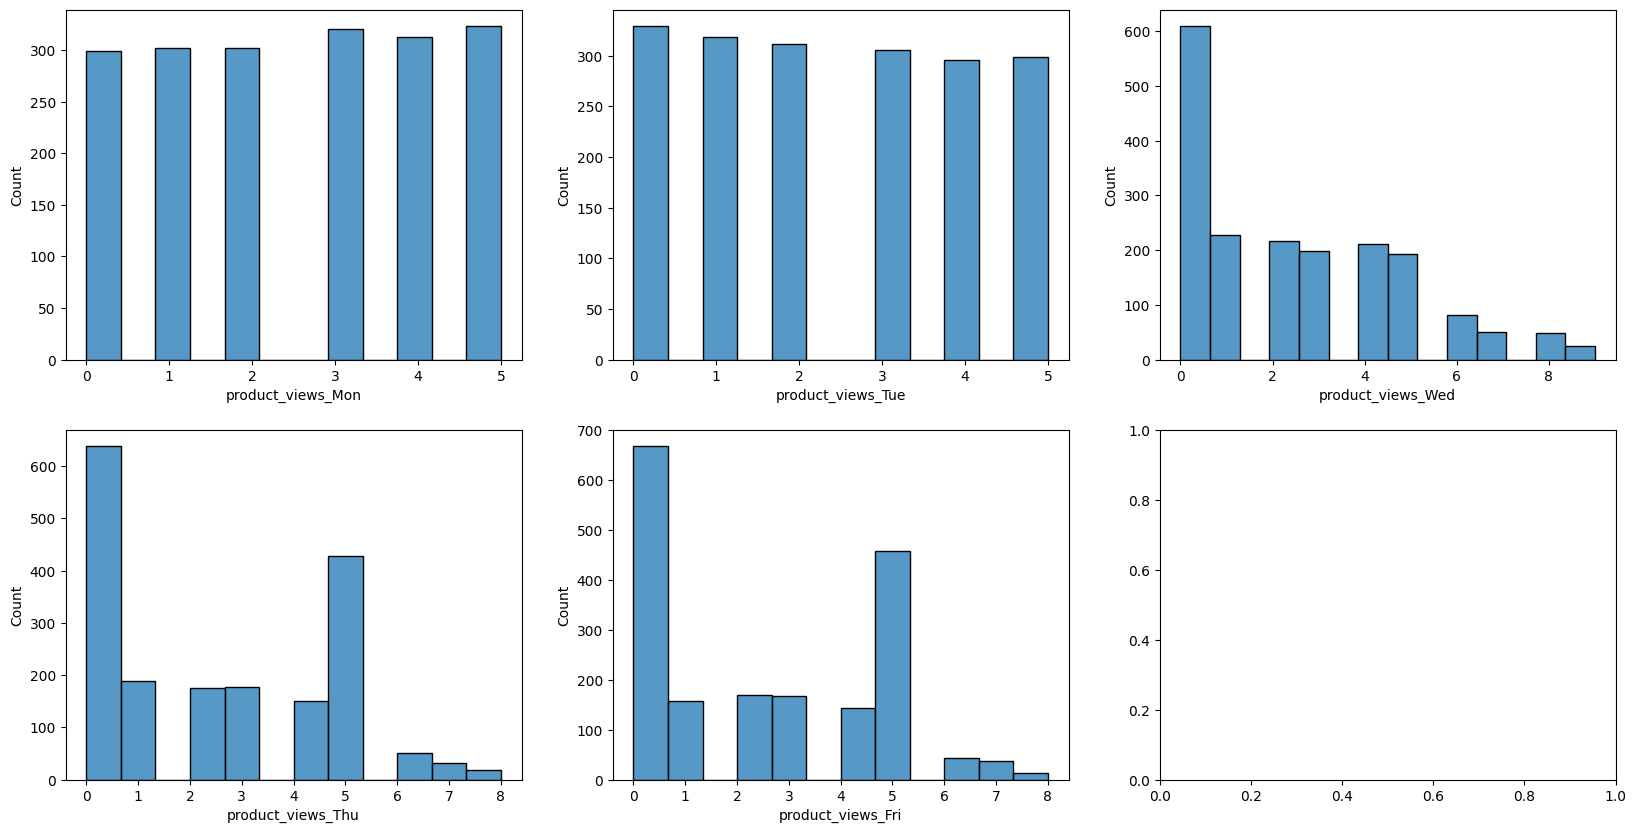

In [393]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['product_views_Mon'], ax=ax1)
sns.histplot(df['product_views_Tue'], ax=ax2)
sns.histplot(df['product_views_Wed'], ax=ax3)
sns.histplot(df['product_views_Thu'], ax=ax4)
sns.histplot(df['product_views_Fri'], ax=ax5)

plt.show()

Now I have no negative views values for any of the days.

Therefore I can now move onto Data Exploration

# Data Exploration

In data exploration we will look at how each variable in the dataset interacts with our target variable, converted_Fri

In [394]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

### Continuous Variables

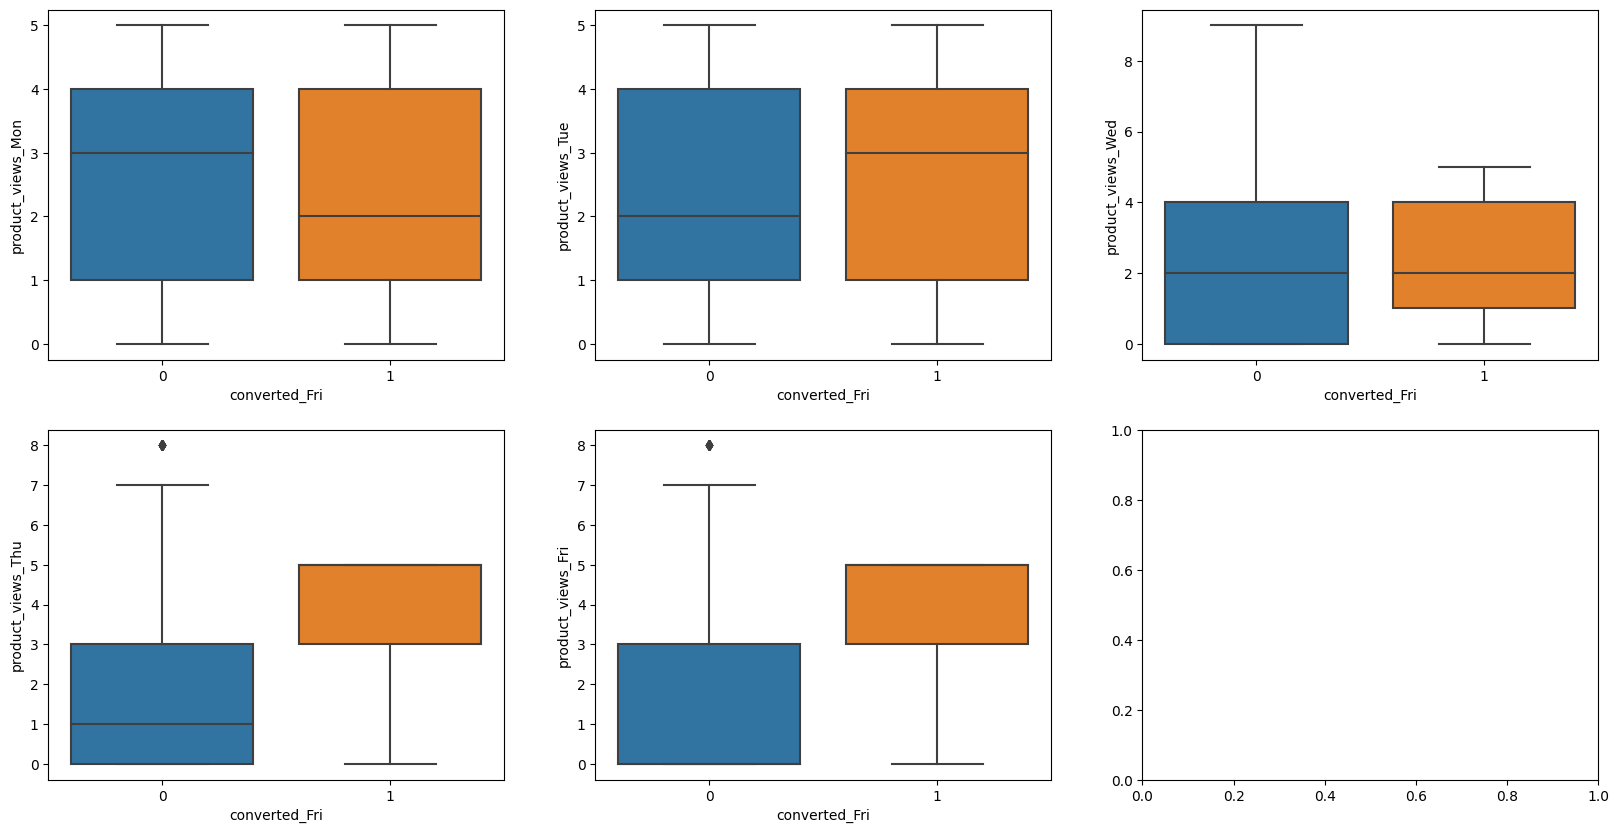

In [395]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x = 'converted_Fri', y = 'product_views_Mon', data = df, ax=ax1)
sns.boxplot(x = 'converted_Fri', y = 'product_views_Tue', data = df, ax=ax2)
sns.boxplot(x = 'converted_Fri', y = 'product_views_Wed', data = df, ax=ax3)
sns.boxplot(x = 'converted_Fri', y = 'product_views_Thu', data = df, ax=ax4)
sns.boxplot(x = 'converted_Fri', y = 'product_views_Fri', data = df, ax=ax5)

plt.show()

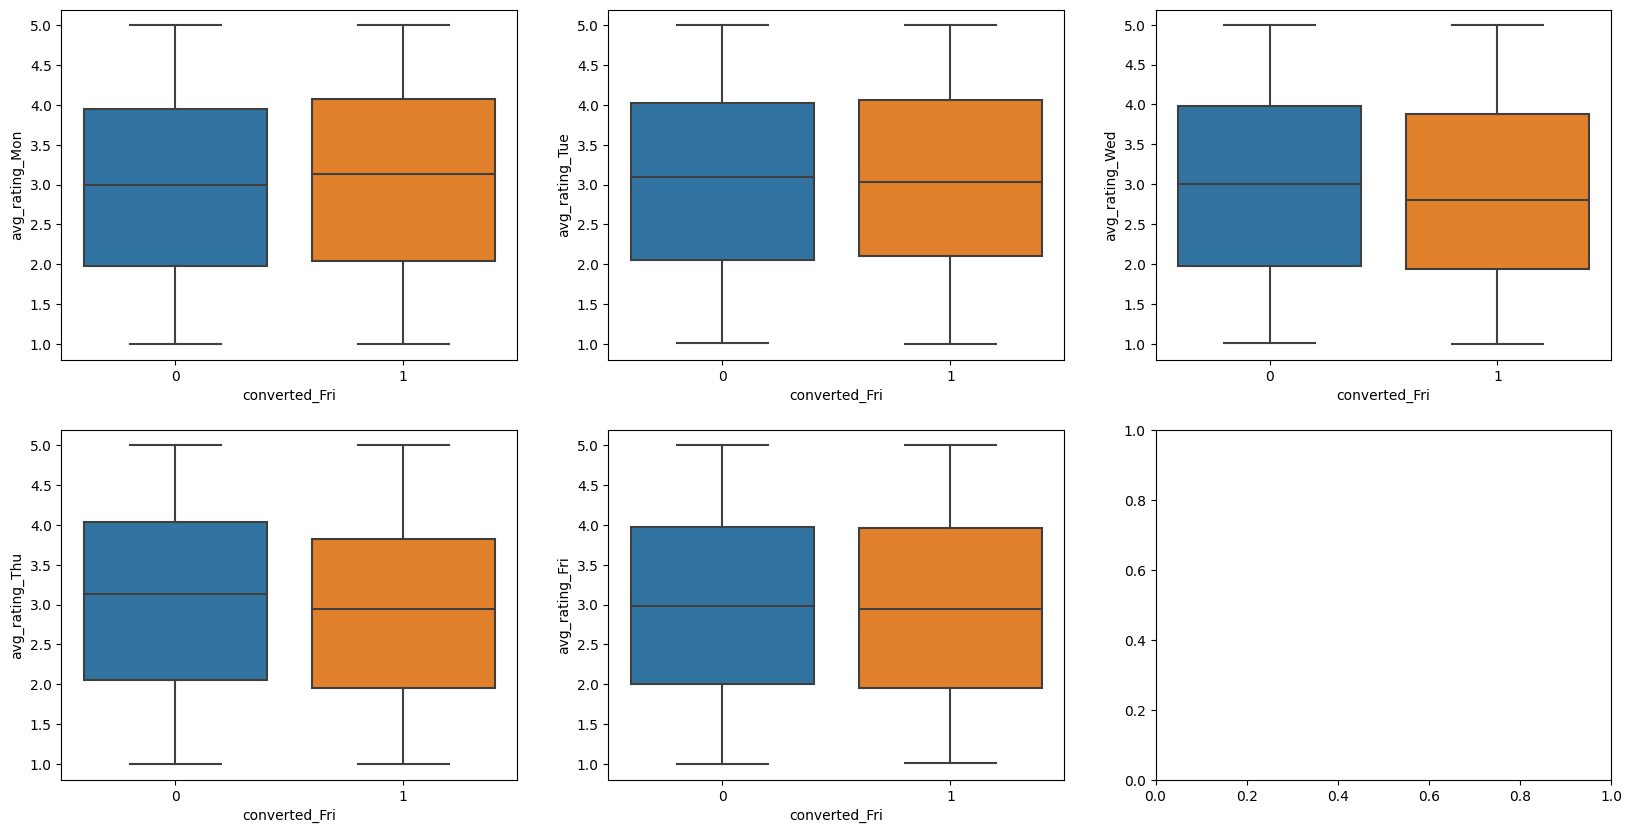

In [396]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x = 'converted_Fri', y = 'avg_rating_Mon', data = df, ax=ax1)
sns.boxplot(x = 'converted_Fri', y = 'avg_rating_Tue', data = df, ax=ax2)
sns.boxplot(x = 'converted_Fri', y = 'avg_rating_Wed', data = df, ax=ax3)
sns.boxplot(x = 'converted_Fri', y = 'avg_rating_Thu', data = df, ax=ax4)
sns.boxplot(x = 'converted_Fri', y = 'avg_rating_Fri', data = df, ax=ax5)

plt.show()

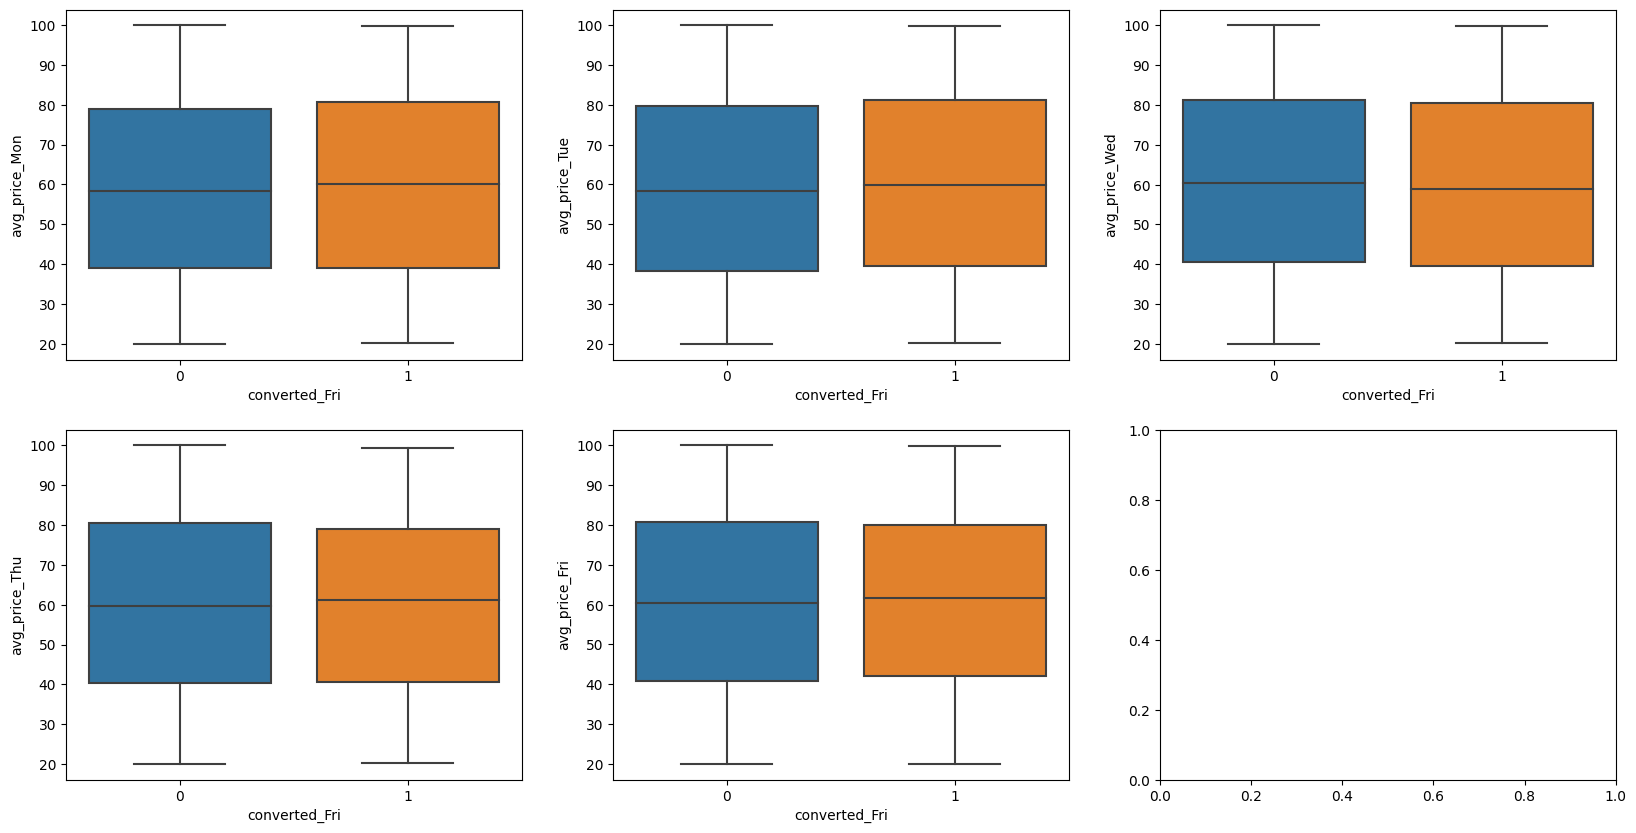

In [397]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x = 'converted_Fri', y = 'avg_price_Mon', data = df, ax=ax1)
sns.boxplot(x = 'converted_Fri', y = 'avg_price_Tue', data = df, ax=ax2)
sns.boxplot(x = 'converted_Fri', y = 'avg_price_Wed', data = df, ax=ax3)
sns.boxplot(x = 'converted_Fri', y = 'avg_price_Thu', data = df, ax=ax4)
sns.boxplot(x = 'converted_Fri', y = 'avg_price_Fri', data = df, ax=ax5)

plt.show()

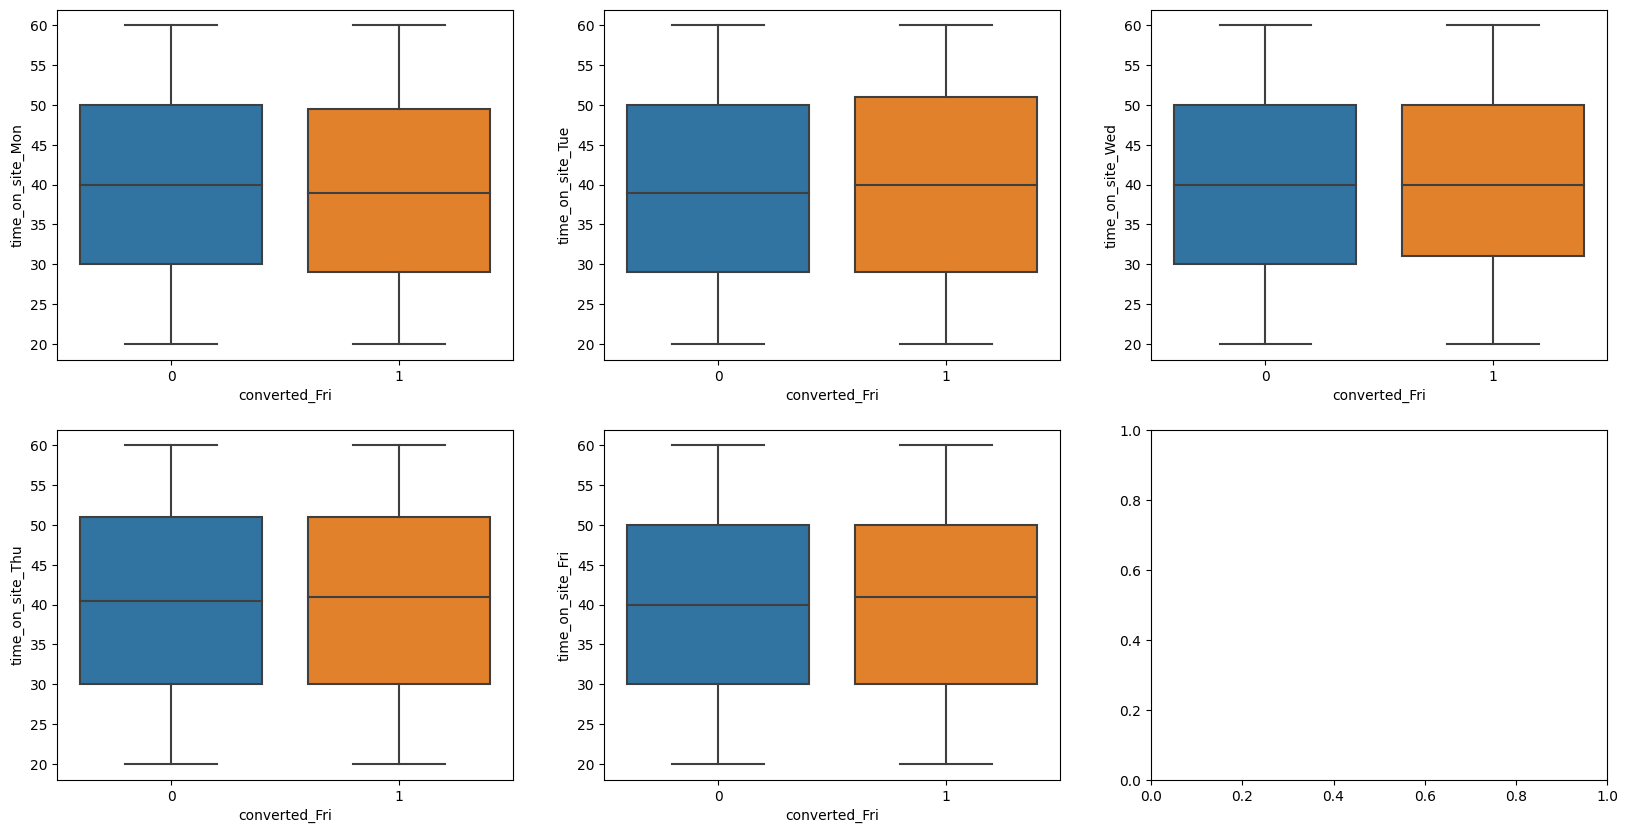

In [398]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x = 'converted_Fri', y = 'time_on_site_Mon', data = df, ax=ax1)
sns.boxplot(x = 'converted_Fri', y = 'time_on_site_Tue', data = df, ax=ax2)
sns.boxplot(x = 'converted_Fri', y = 'time_on_site_Wed', data = df, ax=ax3)
sns.boxplot(x = 'converted_Fri', y = 'time_on_site_Thu', data = df, ax=ax4)
sns.boxplot(x = 'converted_Fri', y = 'time_on_site_Fri', data = df, ax=ax5)

plt.show()

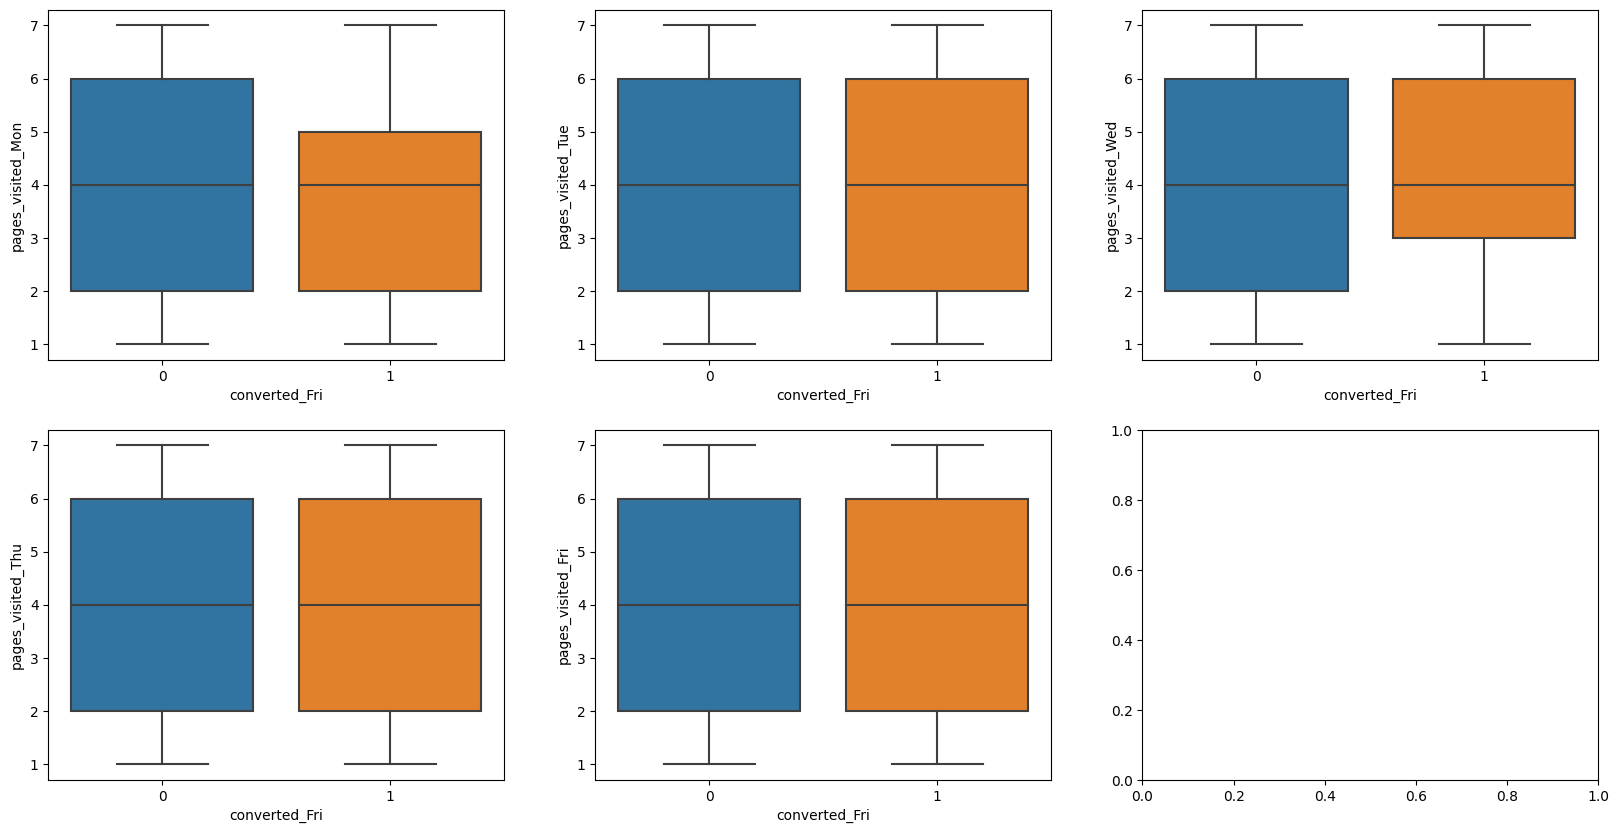

In [399]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x = 'converted_Fri', y = 'pages_visited_Mon', data = df, ax=ax1)
sns.boxplot(x = 'converted_Fri', y = 'pages_visited_Tue', data = df, ax=ax2)
sns.boxplot(x = 'converted_Fri', y = 'pages_visited_Wed', data = df, ax=ax3)
sns.boxplot(x = 'converted_Fri', y = 'pages_visited_Thu', data = df, ax=ax4)
sns.boxplot(x = 'converted_Fri', y = 'pages_visited_Fri', data = df, ax=ax5)

plt.show()

### Conclusion For Continuous Variable Data Exploration:

When looking at product views, it seems on monday the people that look at a lot of products do not end up converting. However, for the people looking at more products Tuesday onward, the chance of conversion is way higher.

Average rating and average price of products viewed by people that converted or not seem to be very comparable. 

The average time on site also seems to be very similar however a bit higher for people that don't convert on Monday and then higher for people that convert on every other day of the week. This could relate to the amount of products viewed which is higher later on in the week by people that convert.

Finally, the number of pages visited is very similar on most days between people who convert and people who dont, once again Monday sticks out as being interesting as people that don't convert look at a lot of pages on Monday. 

### Categorical Variables

In [400]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [401]:
for i in ['visitor_location', 'marketing_channel','gender']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri       0    1
visitor_location          
Asia              231  103
Australia         268  112
Europe            235  127
North America     267  114
South America     255  147
---------------------------------------------
converted_Fri        0    1
marketing_channel          
facebook           238  128
google             234  130
instagram          257  141
organic            311   75
youtube            216  129
---------------------------------------------
converted_Fri    0    1
gender                 
F              602  404
M              654  199
---------------------------------------------


### Conclusions For Categorical Variable Data Exploration 

Visitor Location: The locations seems to have no large influence on the rate of conversion. However, an interesting observation is South Americans seem slightly more likely to convert than any other location.

Marketing Channel: An equal amount of people seem to find the website from each source. However, people who find the store by themselves are much less likely to convert. All of the people that find it from different social media platforms have a similar conversion rate.

gender: Less men have visited the website than females. Also, females have a much higher conversion rate, 40.16%, than men who have a conversion rate of 23.33%

Female Conversion rate: 404 / (404 + 602) = 40.16%

Male Conversion rate: 199 / (654 + 199) = 23.33%

# Feature Engineering

### Binning

Since all of the variables are contained in a small range and the output variable is already a dummy variable, I chose not to bin any of the variables in this dataset

### Dummy Variables

transform the gender variable into a categorical variable that has value either 0 or 1

In [402]:
gender_dummies = pd.get_dummies(df['gender'], dtype=int)

In [403]:
df = pd.concat([df,gender_dummies],axis=1)

In [404]:
df.drop(['gender'],axis=1, inplace=True)

In [405]:
df

,visitor_id,visitor_location,marketing_channel,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,F,M
0,1,North America,youtube,4,5,2,1,2,3.90,2.19,...,46,57,4,5,5,4,6,1,0,1
1,2,South America,organic,2,5,0,1,5,1.31,2.16,...,24,51,5,6,7,6,2,0,1,0
3,4,North America,facebook,1,0,0,5,0,2.66,4.79,...,22,39,3,4,7,7,1,0,0,1
4,5,Asia,instagram,1,5,2,2,3,2.76,2.38,...,47,57,6,6,5,2,4,1,1,0
5,6,South America,organic,2,2,1,1,0,2.80,3.60,...,20,56,5,2,4,5,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,3,0,0,4,2,4.80,3.98,...,44,29,5,1,5,7,7,0,1,0
1996,1997,South America,google,1,2,0,4,1,1.34,1.26,...,59,38,1,6,6,7,6,0,0,1
1997,1998,Asia,facebook,2,3,0,0,8,2.56,4.18,...,48,38,2,1,7,6,4,0,0,1
1998,1999,South America,youtube,2,2,2,5,5,4.49,3.00,...,41,56,6,4,2,2,3,1,1,0


### Define New Metrics

I am defining a metric to see if a person viewed a product every day of the week or not

In [406]:
def all_week(product_views_Mon, product_views_Tue, product_views_Wed, product_views_Thu, product_views_Fri):
    if product_views_Mon > 0 and product_views_Tue > 0 and product_views_Wed > 0 and product_views_Thu > 0 and product_views_Fri > 0:
        return 1
    else:
        return 0

In [407]:
df['all_week'] = df.apply(lambda x: all_week(x['product_views_Mon'], x['product_views_Tue'], x['product_views_Wed'], x['product_views_Thu'], x['product_views_Fri']), axis=1)

In [408]:
def application_function(x):
    good_bad(x['product_views_Mon'], x['product_views_Tue'], x['product_views_Wed'], x['product_views_Thu'], x['product_views_Fri'])

In [409]:
df.head()

,visitor_id,visitor_location,marketing_channel,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,...,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,F,M,all_week
0,1,North America,youtube,4,5,2,1,2,3.90,2.19,...,57,4,5,5,4,6,1,0,1,1
1,2,South America,organic,2,5,0,1,5,1.31,2.16,...,51,5,6,7,6,2,0,1,0,0
3,4,North America,facebook,1,0,0,5,0,2.66,4.79,...,39,3,4,7,7,1,0,0,1,0
4,5,Asia,instagram,1,5,2,2,3,2.76,2.38,...,57,6,6,5,2,4,1,1,0,1
5,6,South America,organic,2,2,1,1,0,2.80,3.60,...,56,5,2,4,5,5,0,0,1,0


In [410]:
for i in ['all_week']:
    print(df.groupby([i,'converted_Fri'])['visitor_id'].count().unstack())
    print('---------------------------------------------')

converted_Fri     0    1
all_week                
0              1132  281
1               124  322
---------------------------------------------


The chance of someone converting if they have viewed a product every day of the week is much higher than if they did not

All Week Conversion Rate = 322 / (322+124) = 72.20%

Not All Week Conversion Rate = 281 / (281+1132) = 18.89%

# Data Model

In [411]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri', 'F', 'M',
       'all_week'],
      dtype='object')

### Logistic Regression

In [412]:
columns = df[['visitor_id', 'visitor_location', 'marketing_channel',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'F', 'M', 'all_week']]

defining the columns to be used in the models and the target variable

the target variable is converted Fri as we want to predict whether or not a user will convert or not

The variables used in the models will only be the numeric values as to take out the non dummy categorical variables.

In [413]:
X = columns.select_dtypes(include='number')
y = df['converted_Fri']

In [414]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [415]:
log_reg = linear_model.LogisticRegression(solver = 'newton-cg', max_iter=50)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [416]:
cv_scores_log = cross_val_score(log_reg, X_train, y_train, cv=10, scoring='f1')

In [417]:
print("Cross-validation scores for Logistic Regression: ", cv_scores_log)

Cross-validation scores for Logistic Regression:  [0.71428571 0.61333333 0.725      0.64       0.65822785 0.73170732
 0.70588235 0.75294118 0.61333333 0.66666667]


In [435]:
cv_scores_log.mean()

0.6821377742205249

In [418]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       367
           1       0.79      0.70      0.74       191

    accuracy                           0.83       558
   macro avg       0.82      0.80      0.81       558
weighted avg       0.83      0.83      0.83       558



### Naive Bayes

In [419]:
gnb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7] }
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_gnb = best_model.predict(X_test)

In [420]:
cv_scores_nb = cross_val_score(best_model, X_train, y_train, cv=10, scoring='f1')
print("Cross-validation scores for Gaussian Naive Bayes: ", cv_scores_nb)

Cross-validation scores for Gaussian Naive Bayes:  [0.69333333 0.62337662 0.64935065 0.68421053 0.70731707 0.75294118
 0.73417722 0.74074074 0.7        0.7012987 ]


In [436]:
cv_scores_nb.mean()

0.698674603924703

In [421]:
print("Classification Report:")
print(classification_report(y_test, y_pred_gnb))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       367
           1       0.77      0.71      0.74       191

    accuracy                           0.83       558
   macro avg       0.81      0.80      0.81       558
weighted avg       0.83      0.83      0.83       558



### KNN

In [422]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [423]:
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

In [424]:
print("Cross-validation scores for KNN: ", cv_scores_knn)

Cross-validation scores for KNN:  [0.63636364 0.49180328 0.61971831 0.61290323 0.50793651 0.62686567
 0.58461538 0.66666667 0.47619048 0.64615385]


In [437]:
cv_scores_knn.mean()

0.586921700392244

In [425]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       367
           1       0.80      0.51      0.62       191

    accuracy                           0.79       558
   macro avg       0.79      0.72      0.74       558
weighted avg       0.79      0.79      0.77       558



### SVC

In [426]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [427]:
cv_scores_svc = cross_val_score(svc, X_train, y_train, cv=10, scoring='f1')

In [428]:
print("Cross-validation scores for SVC: ", cv_scores_svc)

Cross-validation scores for SVC:  [0.67567568 0.5974026  0.68421053 0.66666667 0.65789474 0.73809524
 0.68493151 0.7816092  0.66666667 0.7027027 ]


In [438]:
cv_scores_svc.mean()

0.6855855512619057

In [429]:
print("Classification Report:")
print(classification_report(y_test, pred_svc))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       367
           1       0.77      0.65      0.71       191

    accuracy                           0.81       558
   macro avg       0.80      0.78      0.78       558
weighted avg       0.81      0.81      0.81       558



### Decision Tree

In [430]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [431]:
cv_scores_dt = cross_val_score(d_tree, X_train, y_train, cv=10, scoring='f1')

In [432]:
print("Cross-validation scores for Decision Tree: ", cv_scores_dt)

Cross-validation scores for Decision Tree:  [0.79012346 0.75675676 0.77922078 0.73170732 0.82926829 0.76404494
 0.85714286 0.72093023 0.7654321  0.79487179]


In [439]:
cv_scores_dt.mean()

0.7789498529682205

In [433]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       367
           1       0.80      0.73      0.77       191

    accuracy                           0.85       558
   macro avg       0.84      0.82      0.83       558
weighted avg       0.85      0.85      0.85       558



Log Regression f1: 0.6821377742205249

Naive Bayes f1: 0.698674603924703

KNN f1: 0.586921700392244

SVC f1: 0.6855855512619057

Decision Tree f1: 0.7789498529682205

For this reason we will tune the decision tree model

In [469]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=4)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [470]:
cv_scores_dt = cross_val_score(d_tree, X_train, y_train, cv=10, scoring='f1')

In [471]:
print("Cross-validation scores for Decision Tree: ", cv_scores_dt)

Cross-validation scores for Decision Tree:  [0.79518072 0.86486486 0.81012658 0.75268817 0.76923077 0.80952381
 0.82926829 0.8        0.79012346 0.78947368]


In [472]:
cv_scores_dt.mean()

0.8010480354516079

By tuning the model and changing the max depth of the tree, I was able to improve the model f1 score to 0.801

# Explaining the Results

### what are the characteristics of users who convert (behavioural and demographic)?

Users that usually convert have a few similar characteristics. For starters, females generally convert at a much higher rate then males. Less men also make it to the website in the first place. The location of the visitor does not have a huge influence but it is clear people from South America are more likely to convert than any other location. The channel people access the website from does have a large impact on whether or not they convert as people who find the website on their own are much less liekly to convert than anyone else. When looking at when people view products, I found that people that look at a lot of products on Monday do not end up converting where every other day the more items people look at, the more likely they are to convert. The average time on site also seems to be very similar however a bit higher for people that don't convert on Monday and then higher for people that convert on every other day of the week. This could relate to the amount of products viewed which is higher later on in the week by people that convert. The last variable from the inital dataset that influenced whether visitors converted or not was the pages visited. The pages visited is similar for most days between people who convert and who dont. Once again Monday sticks out as being interesting as people that don't convert look at a lot of pages on Monday. 

A variable that I added into the dataset that seemed to influence whether someone converted or not was if they viewed a product every day of the week or not. If they did they had a much higher chance of converting. This could show that if there is an incentive that brings someone back to the website every day of the week. The chance of that person converting could greatly increase.

### Explain your model to a business executive. Your explanation should include the following:

i. Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.

The initial hypothesis I had was if someone was to look at the website every day, would they be more likely to convert than people that don't. When exploring the data I found that the chance of someone converting if they had gone to the website every day of the week was much higher than if they did not. The hypothesis was therefore proved true. 

ii. Your approach for building and evaluating the model. 

My approach to building the models was to split the data into training and testing sets then apply that to each model. I fed in all variables that were provided as well as the variables that I had created. I then evaluated the models based on the f1 score and chose the highest f1 score to pursue. The f1 score predicts the overall model accuracy by combining the use of the precision and recall score of a model. 

iii. The final model you selected and how you know this is the best model for the problem.

I chose to go with the decision tree model. This model had the highest f1 score prior to tuning any of the models. While having the highest f1 score, it also had the highest precision, recall, and accuracy score. Accuracy tells us the number of correct predictions over total predictions, precision tells us the number of true positives over true positives plus false positives, and recall tells us true positives over true positives plus false negatives. Having the highest score in all of these metrics tells us it is the best predictive model. The Decision tree model selected has an f1 score (accuracy) of 0.801. This allows the business to see with 80% accuracy whether or not a consumer with specific characteristics will convert or not.

iv. How the model should be used by the business, in business process.

The model can be used by the business to evaluate the characteristics of users that are likely to convert. Then these visitors are the people that the business can target with its promotional activities. As found within the analysis, people that visit the website everyday throughout the week are more likely to convert. Therefore with this in mind the company can look to create promotions to get visitors to visit the website and view products every week. They could offer a coupon to people on Friday if they go on to the website and complete an action on the website. The hope is this action gets them to the website and while they are there they view a product. This would help increase the amount of conversions. Being able to know what makes people convert will allow the e-commerce company to better structure their promotional activities. 